plotting pid as a function of prediction

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from torchmetrics import ConfusionMatrix
import torch
#path_to_db = "/groups/icecube/peter/storage/Multiclassification/Test/last_one_lvl3MC/dynedge_pid_test_run/results.csv"
path_to_db = "/groups/icecube/peter/storage/Multiclassification/Real/last_one_lvl3MC/dynedge_pid_Real_run_21.5_mill_equal_frac_/results.csv"
feature_data = pd.read_csv(path_to_db, index_col=[0])

In [5]:
preds = ["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]
pids = [1,12,13]

In [6]:
print("unique particle ID's and their count: \n", feature_data[["pid_noise_pred","pid"]].groupby("pid").count())
print()
print("data:")
feature_data

unique particle ID's and their count: 
        pid_noise_pred
pid                  
-16.0          226198
-14.0          256710
-12.0          253786
-1.0          2474861
 12.0          572457
 13.0         2474809
 14.0          567616
 16.0          598563

data:


,pid_noise_pred,pid_muon_pred,pid_neutrino_pred,pid,event_no
0,1.000000e+00,0.000000,0.000000e+00,-1.0,23434375.0
1,3.946079e-22,1.000000,3.906106e-07,13.0,70953235.0
2,1.827151e-20,1.000000,1.306228e-07,13.0,97961265.0
3,3.665486e-01,0.022993,6.104581e-01,12.0,33636682.0
4,2.773106e-01,0.017270,7.054196e-01,12.0,53035643.0
...,...,...,...,...,...
7424995,1.000000e+00,0.000000,0.000000e+00,-1.0,66993636.0
7424996,9.246089e-11,0.916026,8.397368e-02,13.0,58567439.0
7424997,6.353963e-01,0.008736,3.558680e-01,16.0,81515634.0
7424998,8.316677e-03,0.650760,3.409231e-01,16.0,221130.0


In [7]:
## transform data
# remove anti
feature_data['pid'] = feature_data['pid'].apply(abs)
# make all neutrinos the same class; to match training classes
feature_data.loc[feature_data['pid']==14, "pid"]=12
feature_data.loc[feature_data['pid']==16, "pid"]=12

In [8]:
print("unique particle ID's and their count: \n", feature_data[["pid_noise_pred","pid"]].groupby("pid").count())
print()
print("data:")
feature_data

unique particle ID's and their count: 
       pid_noise_pred
pid                 
1.0          2474861
12.0         2475330
13.0         2474809

data:


,pid_noise_pred,pid_muon_pred,pid_neutrino_pred,pid,event_no
0,1.000000e+00,0.000000,0.000000e+00,1.0,23434375.0
1,3.946079e-22,1.000000,3.906106e-07,13.0,70953235.0
2,1.827151e-20,1.000000,1.306228e-07,13.0,97961265.0
3,3.665486e-01,0.022993,6.104581e-01,12.0,33636682.0
4,2.773106e-01,0.017270,7.054196e-01,12.0,53035643.0
...,...,...,...,...,...
7424995,1.000000e+00,0.000000,0.000000e+00,1.0,66993636.0
7424996,9.246089e-11,0.916026,8.397368e-02,13.0,58567439.0
7424997,6.353963e-01,0.008736,3.558680e-01,12.0,81515634.0
7424998,8.316677e-03,0.650760,3.409231e-01,12.0,221130.0


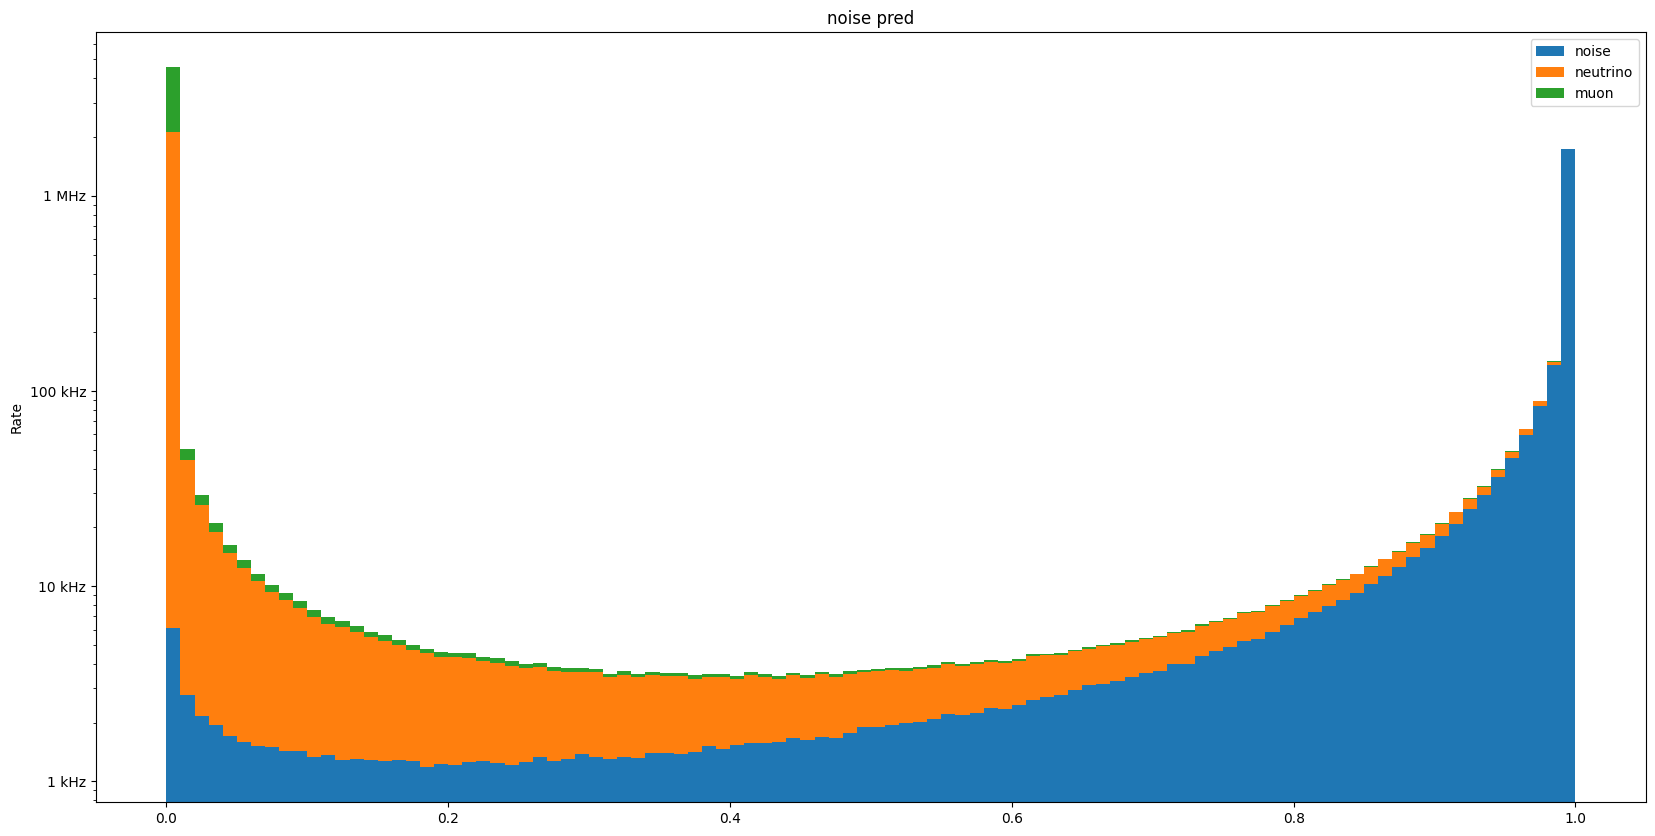

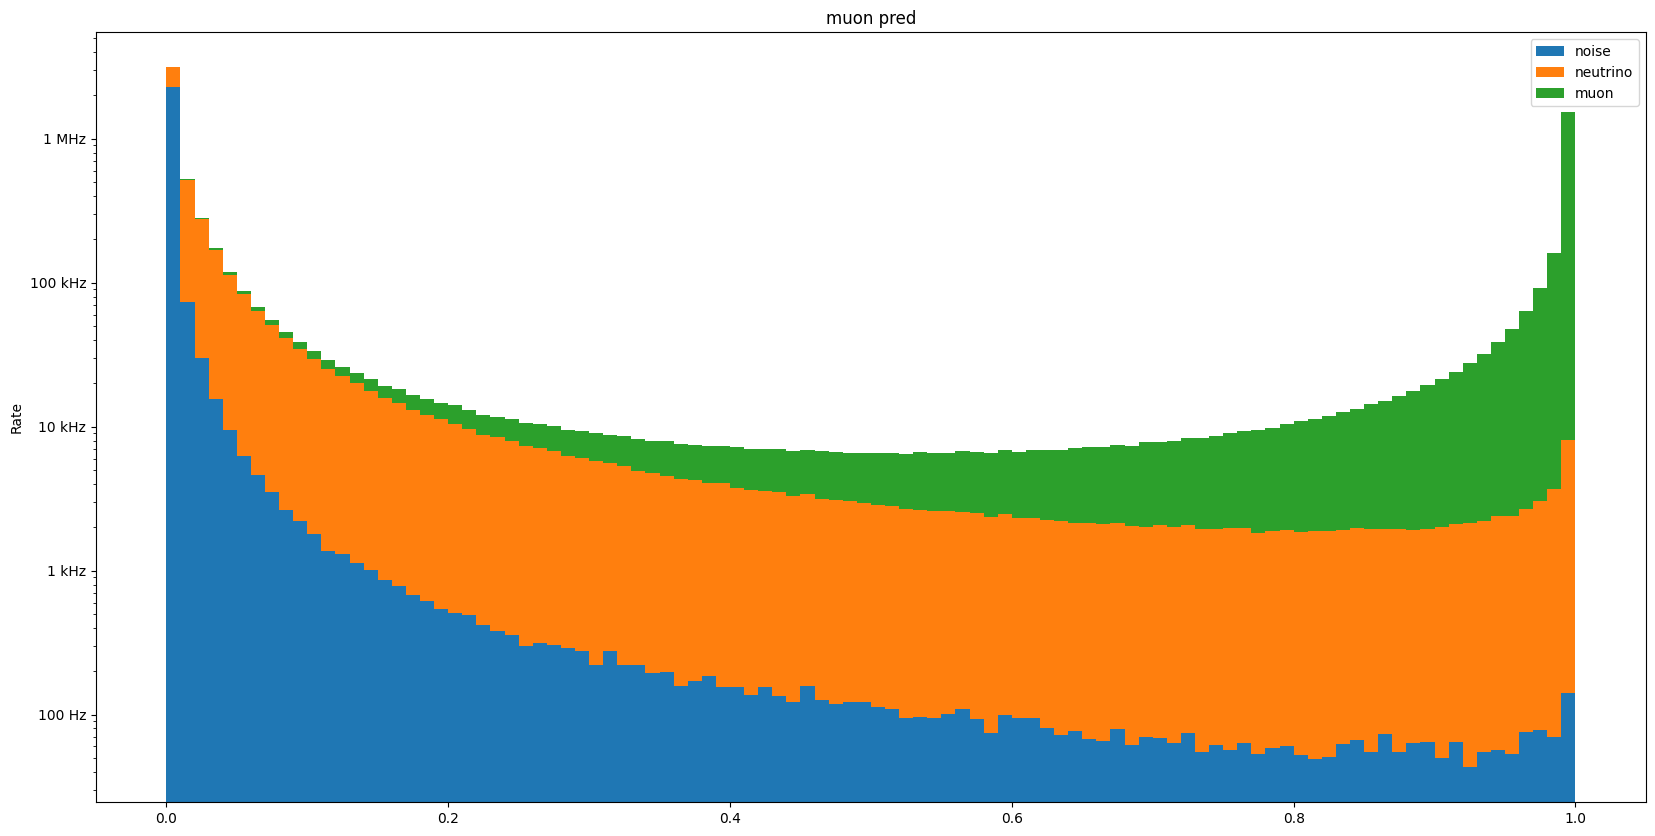

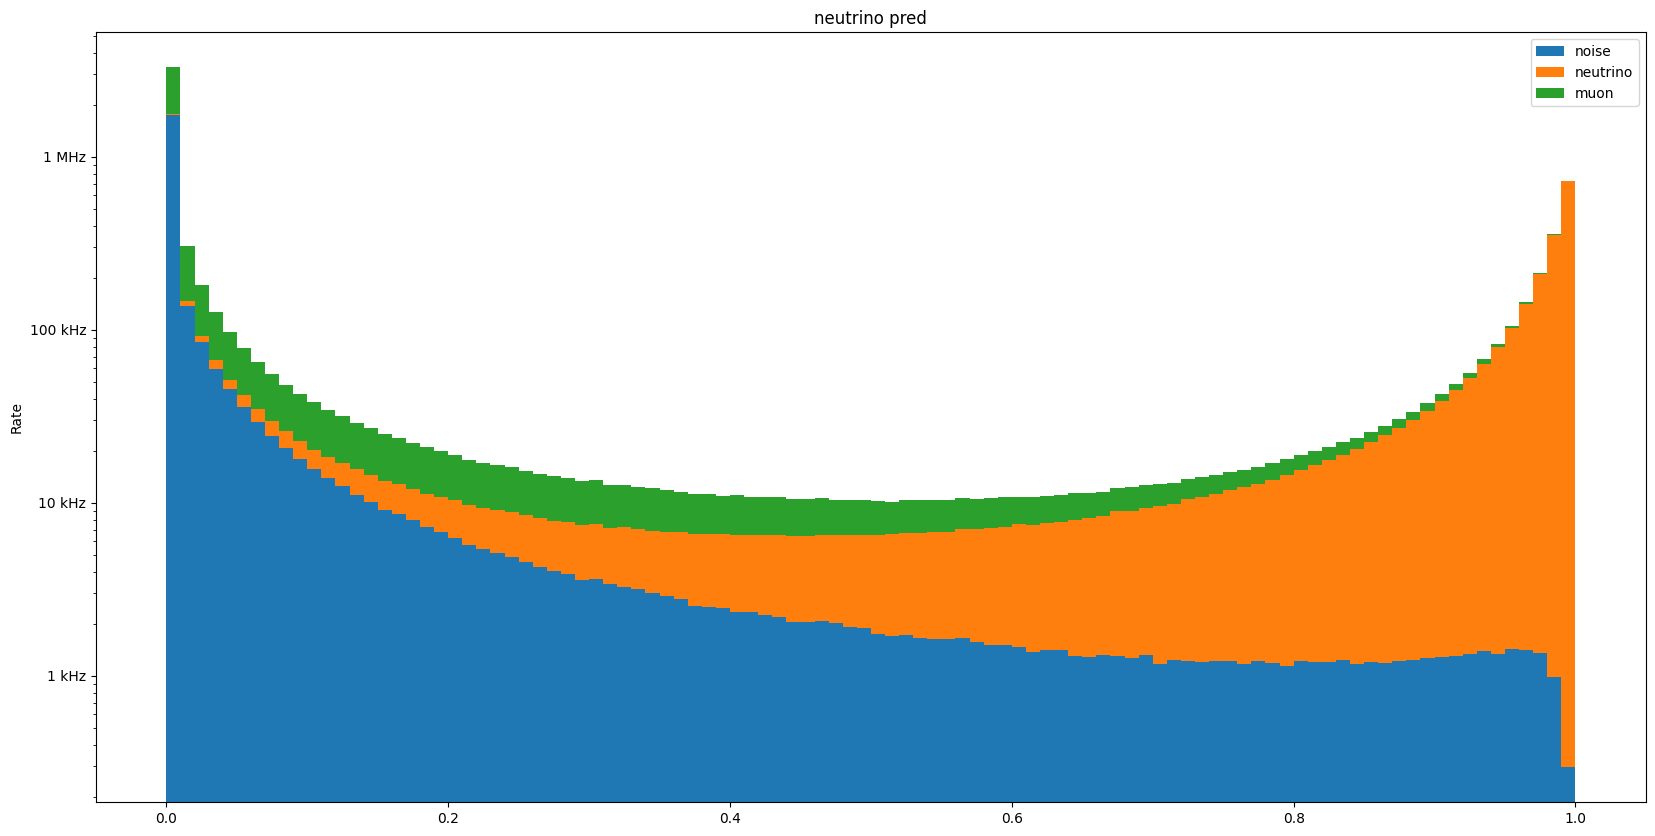

In [9]:

preds = ["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]
pids = [1,12,13]
color=["b","y","g"]
for i, pred in enumerate(preds):
    pid_list=[]
    pid_bin_centers=[]
    
    fig,ax = plt.subplots(figsize=(20,10))

    temp = 0
    for i, pid in enumerate(pids):
        y, bin_edges = np.histogram(feature_data[pred].loc[feature_data["pid"]==pid], bins=50)
        
        pid_list.append(feature_data[pred].loc[feature_data["pid"]==pid])
        pid_bin_centers.append(0.5*(bin_edges[1:] + bin_edges[:-1]))
    
    ax.hist(pid_list, bins=100, log=True, stacked=True, label=("noise", "neutrino", "muon"))
    ax.set(ylabel='Rate',yscale='log')
    ax.yaxis.set_major_formatter(ticker.EngFormatter(unit='Hz'))
    #for i, _ in enumerate(pids):
    #    plt.errorbar(pid_bin_centers[i], pid_histlist[i], yerr = stds[i], fmt=f".{color[i]}")
    plt.title(pred.replace("_"," ")[4:])
    plt.legend()
    plt.savefig("/groups/icecube/qgf305/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/distributions/test_plot/"+pred.replace("_","")[3:-4]+".png")

In [ ]:
feature_data["pid"].loc[feature_data[["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]].max(axis=1)]

In [39]:


preds = feature_data[["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]].copy(deep=True)

preds["pid_noise_pred"] = preds["pid_noise_pred"].loc[feature_data["pid_noise_pred"] > feature_data["pid_muon_pred"]] = 1
preds

/tmp/ipykernel_14541/1288578722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds["pid_noise_pred"] = preds["pid_noise_pred"].loc[feature_data["pid_noise_pred"] > feature_data["pid_muon_pred"]] = 1


,pid_noise_pred,pid_muon_pred,pid_neutrino_pred
0,1,0.000000,0.000000e+00
1,1,1.000000,3.906106e-07
2,1,1.000000,1.306228e-07
3,1,0.022993,6.104581e-01
4,1,0.017270,7.054196e-01
...,...,...,...
7424995,1,0.000000,0.000000e+00
7424996,1,0.916026,8.397368e-02
7424997,1,0.008736,3.558680e-01
7424998,1,0.650760,3.409231e-01


In [21]:

preds = torch.tensor(feature_data[["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]].values)
target = torch.tensor(feature_data["pid"].astype(int).values)
target.size()

torch.Size([7425000])

In [25]:
confmat = ConfusionMatrix(num_classes=3)
confmat(preds, target)

ValueError: The highest label in `target` should be smaller than the size of the `C` dimension of `preds`.